# 선형 모델(Linear Models)

* 선형 모델은 과거 부터 지금 까지 널리 사용되고 연구 되고 있는 기계학습 방법
* 선형 모델은 입력 데이터에 대한 선형 함수를 만들어 예측 수행

* 회귀 분석을 위한 선형 모델은 다음과 같이 정의

\begin{equation}
\hat{y}(w,x) = w_0 + w_1 x_1 + ... + w_p x_p
\end{equation}

  + $x$: 입력 데이터
  + $w$: 모델이 학습할 파라미터
  + $w_0$: 편향
  + $w_1$~$w_p$: 가중치


## 선형 회귀(Linear Regression)

* **선형 회귀(Linear Regression)**또는 **최소제곱법(Ordinary Least Squares)**은 가장 간단한 회귀 분석을 위한 선형 모델
* 선형 회귀는 모델의 예측과 정답 사이의 **평균제곱오차(Mean Squared Error)**를 최소화 하는 학습 파라미터 $w$를 찾음
* 평균제곱오차는 아래와 같이 정의

\begin{equation}
MSE = \frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y}_i)^2
\end{equation}

  + $y$: 정답
  + $\hat{y}$: 예측 값을 의미

* 선형 회귀 모델에서 사용하는 다양한 오류 측정 방법
  + MAE(Mean Absoulte Error)
  + MAPE(Mean Absolute Percentage Error)
  + MSE(Mean Squared Error)
  + MPE(Mean Percentage Error)
  + NMSE(Negative Mean Squared Error)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

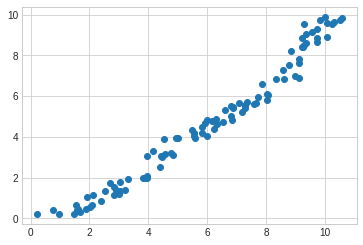

In [ ]:
noise = np.random.rand(100, 1)
X = sorted(10 * np.random.rand(100, 1)) + noise  # X는 feature vector이므로 대문자. np.random.rand에서 100 뒤에 1은 array 차원 할당 -> default가 1이긴 하지만 확실히 하기 위해..
y = sorted(10 * np.random.rand(100))

plt.scatter(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1) # test_size가 넘 작으면 평가가 잘 안될 수 있음
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print("선형 회귀 가중치: {}".format(model.coef_)) # W 가중치들의 벡터 값
print("선형 회귀 편향: {}".format(model.intercept_)) # w0 값

선형 회귀 가중치: [1.03043675]
선형 회귀 편향: -1.442853634800512


In [ ]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9695387541245084
평가 데이터 점수: 0.9448516894483115


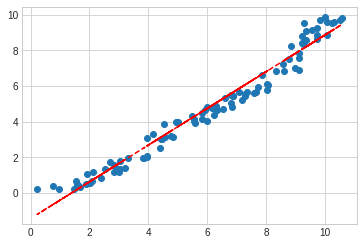

In [ ]:
predict = model.predict(X)

plt.scatter(X, y)
plt.plot(X, predict, '--r')

### 보스턴 주택 가격 데이터

* 주택 가격 데이터는 도시에 대한 분석과 부동산, 경제적인 정보 분석 등 많은 활용 가능한 측면들이 존재
* 보스턴 주택 가격 데이터는 카네기 멜론 대학교에서 관리하는 StatLib 라이브러리에서 가져온 것
* 헤리슨(Harrison, D.)과 루빈펠트(Rubinfeld, D. L.)의 논문 "Hedonic prices and the demand for clean air', J. Environ. Economics & Management"에서 보스턴 데이터가 사용
* 1970년도 인구 조사에서 보스턴의 506개 조사 구역과 주택 가격에 영향을 주는 속성 21개로 구성

| 속성 | 설명 |
|------|------|
| CRIM | 자치시(town)별 1인당 범죄율 |
| ZN | 25,000 평방 피트가 넘는 거주지역 토지 비율 |
| INDUS | 자치시(town)별 비소매 상업지역 토지 비율 |
| CHAS | 찰스 강(Charles River)에 대한 변수 (강의 경계에 위치하면 1, 그렇지 않으면 0) |
| NOX | 10,000,000당  일산화질소 농도 |
| RM | 주택 1가구당 평균 방의 수 |
| AGE | 1940년 이전에 건축된 소유주택 비율 |
| DIS | 5개의 보스턴 고용 센터까지의 가중 거리 |
| RAD | 방사형 고속도로 접근성 지수 |
| TAX | 10,000 달러당 재산 세율 |
| PTRATIO | 자치시(town)별 학생/교사 비율 |
| B | 1000(Bk-0.63)^2, Bk: 자치시별 흑인 비율 |
| LSTAT | 모집단의 하위계층 비율(%) |
| MEDV | 소유자가 거주하는 주택가격(중앙값) (단위: 1,000 달러) |

In [ ]:
from sklearn.datasets import load_boston

boston = load_boston()
print(boston.keys())
print(boston.feature_names)
print(boston.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employ

In [ ]:
import pandas as pd

boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_df['MEDV'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

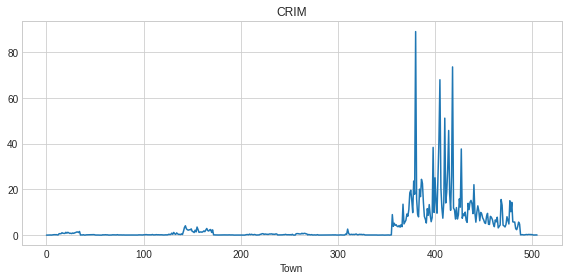

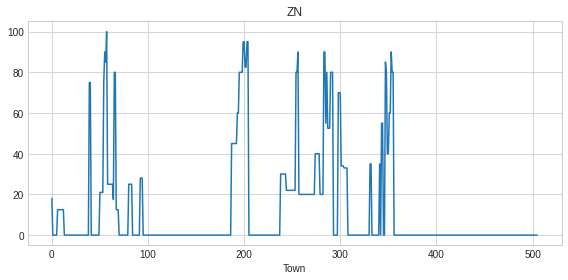

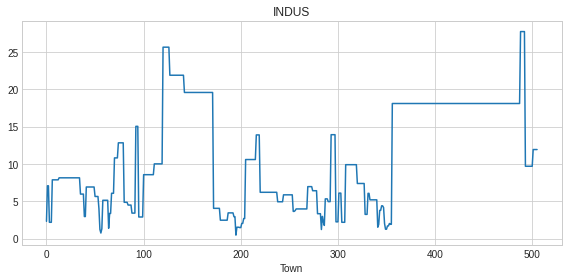

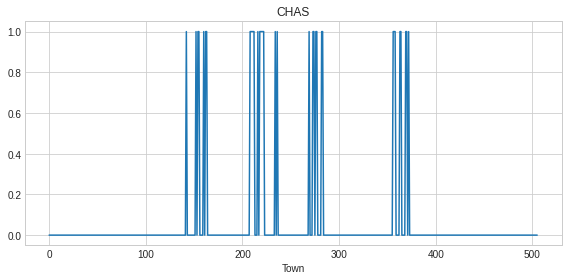

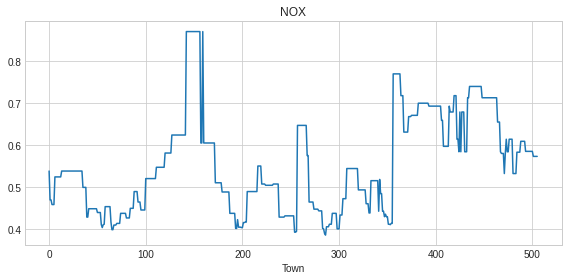

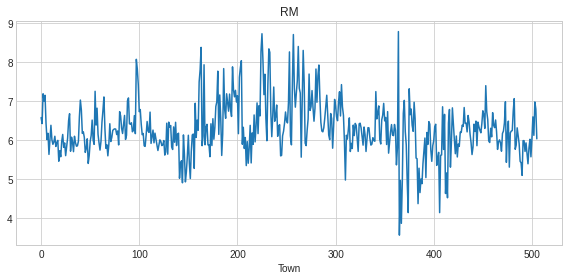

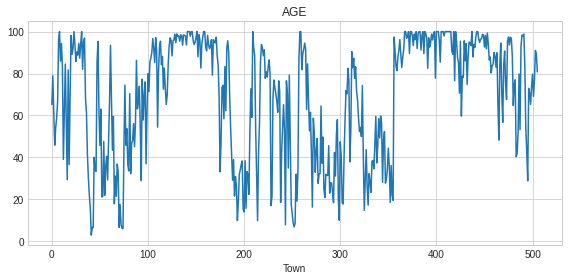

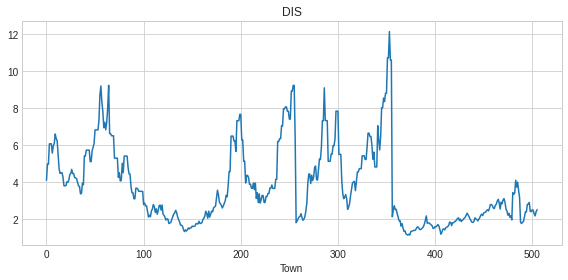

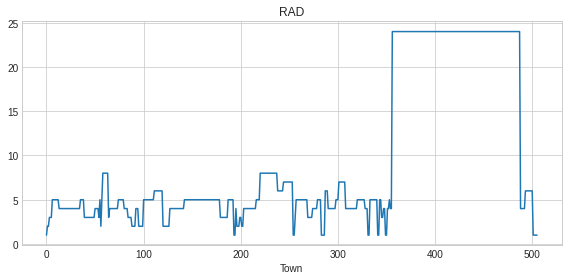

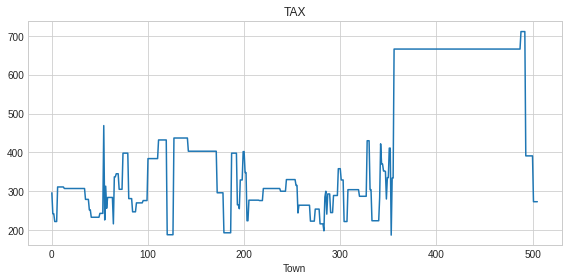

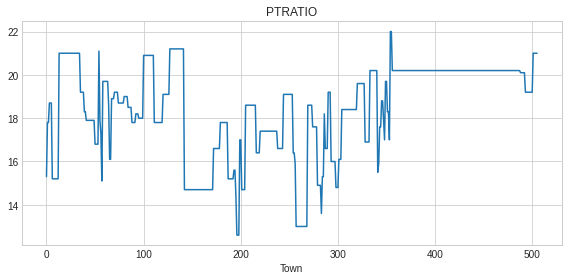

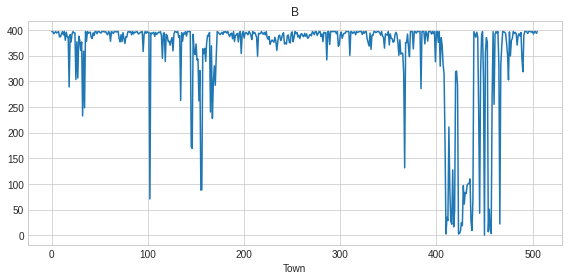

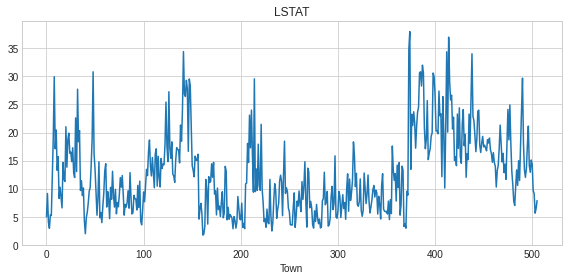

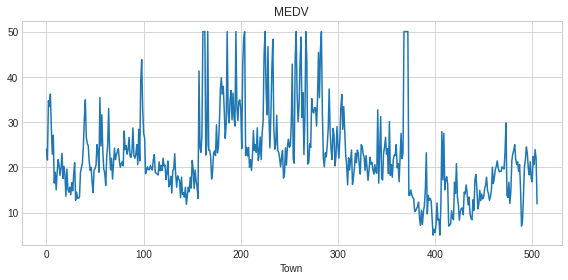

In [ ]:
for col in boston_df.columns:
  plt.figure(figsize = (8, 4))
  plt.plot(boston_df[col])
  plt.title(col)
  plt.xlabel('Town')
  plt.tight_layout()

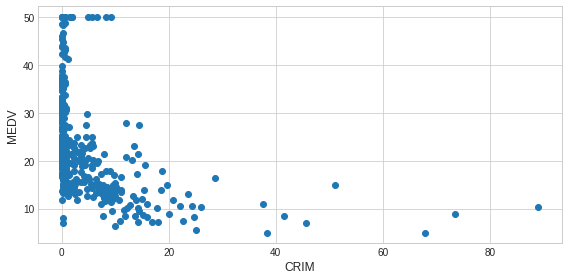

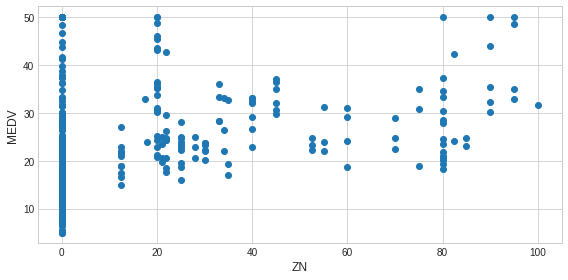

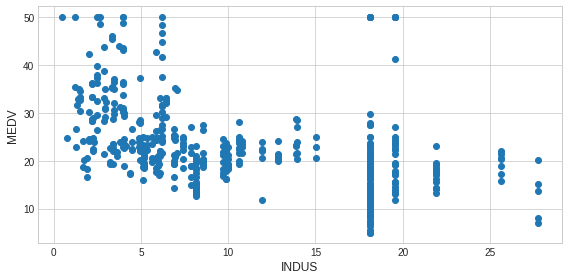

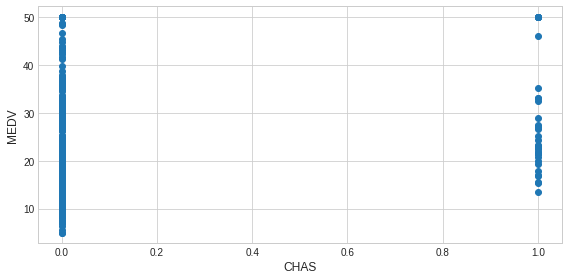

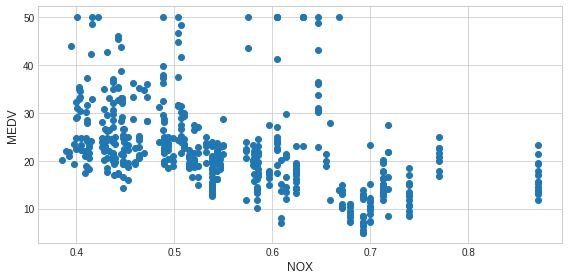

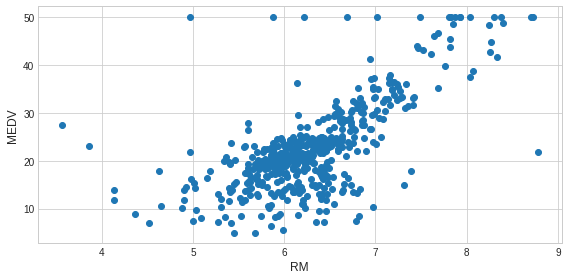

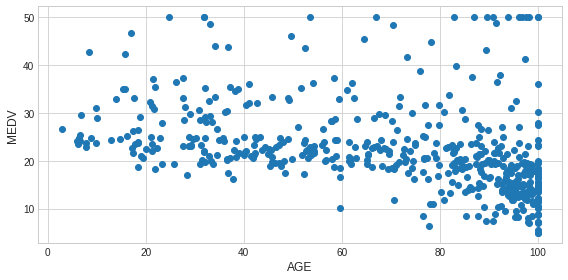

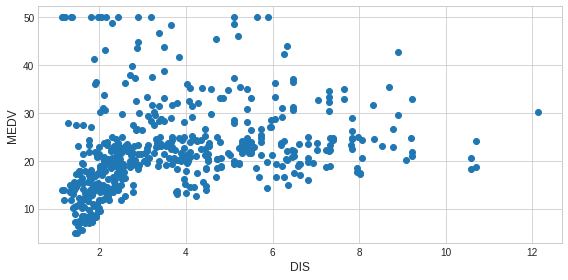

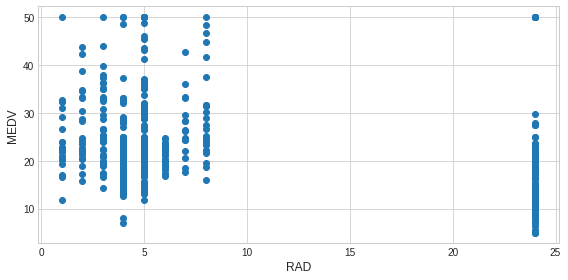

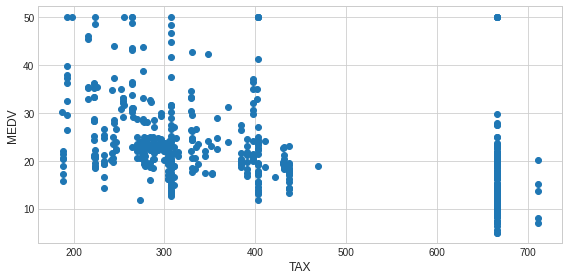

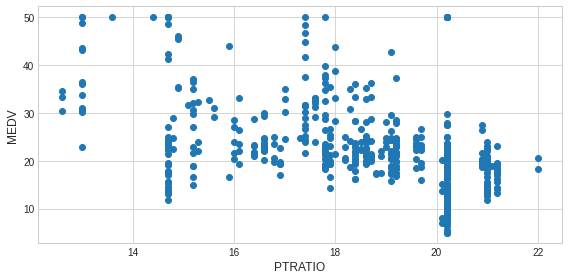

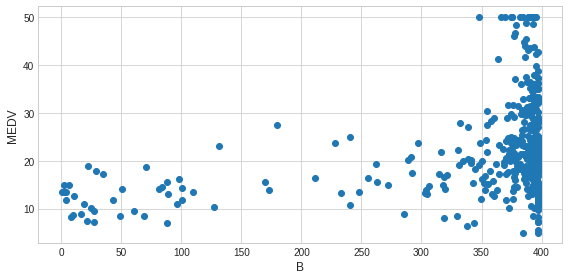

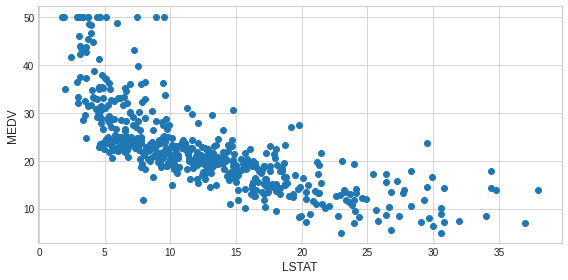

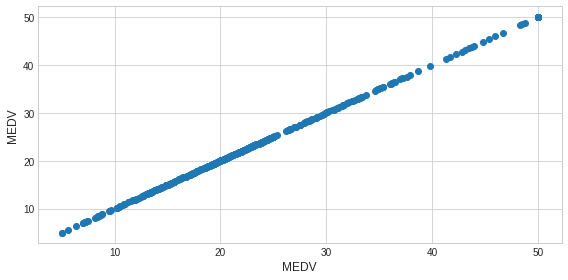

In [ ]:
for col in boston_df.columns:
  plt.figure(figsize = (8, 4))
  plt.scatter(boston_df[col], boston_df['MEDV'])
  plt.ylabel("MEDV", size = 12)
  plt.xlabel(col, size = 12)
  plt.tight_layout()

In [ ]:
import seaborn as sns

sns.pairplot(boston_df);

KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fb385180560> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7fb385188050> (for post_execute):


KeyboardInterrupt: ignored

### 보스턴 주택 가격에 대한 선형 회귀

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(normalize = True)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size = 0.2)

model.fit(X_train, y_train)
model.score(X_test, y_test)

In [ ]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

* 데이터를 두개로 분리하고 모델을 생성 및 검증하였지만, 데이터를 분리하였기 때문에 훈련에 사용할 수 있는 양도 작아지고, 분리가 잘 안된 경우에는 잘못된 검증이 될 수 있음
* 이럴 경우에는 테스트셋을 여러개로 구성하여 교차 검증을 진행
* `cross_val_score()` 함수는 교차 검증을 수행하여 모델을 검증
* 다음 예제에서는 모델 오류를 측정하는 점수로 NMSE(Negative Mean Squared Error)를 사용

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, boston.data, boston.target, cv = 10, scoring = 'neg_mean_squared_error')
print("NMSE scroes: {}".format(scores))
print("NMSE scroes mean: {}".format(scores.mean))
print("NMSE scroes std: {}".format(scores.std))

NameError: ignored

* 회귀모델의 검증을 위한 또 다른 측정 지표 중 하나로 결정 계수(coefficient of determination, $R^2$) 사용

In [ ]:
r2_scores = cross_val_score(model, boston.data, boston.target, cv = 10,  scoring= 'r2')

print('R2 scores: {}'.format(r2_scores))
print('R2 scores mean: {}'.format(r2_scores.mean()))
print('R2 scores std: {}'.format(r2_scores.std()))

생성된 회귀 모델에 대해서 평가를 위해 LinearRegression 객체에 포함된 두 개의 속성 값을 통해 수식을 표현
* intercept_: 추정된 상수항
* coef_: 추정된 가중치 벡터
* 뒷부분에 언더바가 들어가는 변수는 모델 자체에서 알려주는 값들

In [ ]:
print('y = ' + str(model.intercept_)+' ')
for i, c in enumerate(model.coef_):
  print(str(c)+' *x' + str(i))

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_train_predict = model.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, y_train_predict))
r2 = r2_score(y_train, y_train_predict)

print('RMSE: {}'.format(rmse))
print('R2 Score:{}'.format(r2))

NameError: ignored

In [ ]:
y_test_predict = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_test_predict))
r2 = r2_score(y_test, y_test_predict)

print('RMSE: {}'.format(rmse))
print('R2 Score:{}'.format(r2))

In [ ]:
def plot_boston_prices(expected,  predicted):
  plt.figure(figsize = (8, 4))
  plt.scatter(expected, predicted)
  plt.plot([5,  50], [5, 50], '--r')
  plt.xlabel('True price($1,000s')
  plt.ylabel('Predicted price ($1,000s)')
  plt.tight_layout()

predicted = model.predict(X_test)
expected = y_test

plot_boston_prices(expected, predicted)

NameError: ignored

### 캘리포니아 주택 가격 데이터

| 속성 | 설명 |
|------|------|
| MedInc | 블록의 중간 소득 |
| HouseAge | 블록의 중간 주택 연도 |
| AveRooms | 평균 방 수 |
| AveBedrms | 평균 침실 수 |
| Population | 블록 내 거주중인 인구 수 |
| AveOccup | 평균 주택점유율 |
| Latitude | 주택 블록 위도 |
| Longitude | 주택 블록 경도 |

In [ ]:
from sklearn.datasets  import fetch_california_housing

california  = fetch_california_housing()
print(california.keys())
print(california.DESCR)

In [ ]:
import pandas as pd

california_df = pd.DataFrame(california.data, columns = california.feature_names)
california_df['Target'] = california.target
california_df.head()

In [ ]:
california_df.describe()

In [ ]:
import matplotlib.pyplot as plt

for i, col in enumerate(california_df.columns):
  plt.figure(figsize = (8, 5))
  plt.plot(california_df[col])
  plt.title(col)
  plt.tight_layout()

In [ ]:
import matplotlib.pyplot as plt

for i, col in enumerate(california_df.columns):
  plt.figure(figsize = (8, 5))
  plt.scatter(california_df[col], california_df['Target'])
  plt.ylabel('Target', size = 12)
  plt.xlabel(col, size = 12)
  plt.tight_layout()

In [ ]:
import seaborn as sns

sns.pairplot(california_df.sample(1000));

In [ ]:
california_df.plot(kind = 'scatter', x = 'Longitude', y = 'Latitude', alpha = 0.2, figsize = (12, 10))

In [ ]:
california_df.plot(kind = 'scatter', x = 'Longitude', y = 'Latitude', alpha = 0.2,
                   s = california_df['Population']/100, label = 'Population', figsize = (15, 10),
                   c = 'Target', cmap = plt.get_cmap('viridis'), colorbar = True) # s 는 point의 size, c는 color, cmap은 color map

### 캘리포니아 주택 가격에 대한 선형 회귀

In [ ]:
model = LinearRegression(normalize = True)

X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size = 0.2)

model.fit(X_train, y_train)
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

scores = cross_val_score(model, california.data, california.target, cv=10, scoring = 'neg_mean_squared_error')

print('NMSE mean: {}'.format(scores.mean()))
print('NMSE std: {}'.format(scores.std()))

r2_scores = cross_val_score(model, california.data, california.target, cv = 10 , scoring = 'r2')
print('R2 Scroe mean: {}'.format(r2_scores.mean()))

In [ ]:
print('y = '+str(model.intercept_)+' ')
for i, c in enumerate(model.coef_):
  print(str(c) + ' *'+str(i))

In [ ]:
y_train_predict = model.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, y_train_predict))
r2 = r2_score(y_train, y_train_predict)

print('RMSE: {}'.format(rmse))
print('R2 Score: {}'.format(r2))

In [ ]:
y_test_predict = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_test_predict))
r2 = r2_score(y_test, y_test_predict)

print('RMSE: {}'.format(rmse))
print('R2 Score: {}'.format(r2))

In [ ]:
def plot_california_prices(expected, predicted):
  plt.figure(figsize = (8, 4))
  plt.scatter(expected, predicted)
  plt.plot([0, 5], [0, 5], '--r')
  plt.xlabel('True price ($100,000s)')
  plt.ylabel('Predicted price ($100,000s)')
  plt.tight_layout()

predicted = model.predict(X_test)
expected = y_test

plot_california_prices(expected, predicted)

## 릿지 회귀(Ridge Regression)

* 릿지 회귀는 선형 회귀를 개선한 선형 모델
* 릿지 회귀는 선형 회귀와 비슷하지만, 가중치의 절대값을 최대한 작게 만든다는 것이 다름
* 이러한 방법은 각각의 특성(feature)이 출력 값에 주는 영향을 최소한으로 만들도록 규제(regularization)를 거는 것
* 규제를 사용하면 다중공선성(multicollinearity) 문제를 방지하기 때문에 모델의 과대적합(overfitting)을 막을 수 있게 됨 > test data에대해 점수가 높아질 수 있음
* 다중공선성 문제는 두 특성이 일치에 가까울 정도로 관련성(상관관계)이 높을 경우 발생
* 릿지 회귀는 다음과 같은 함수를 최소화 하는 파라미터 $w$를 찾음

\begin{equation}
RidgeMSE = \frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y}_i)^2 + \alpha \sum_{i=1}^{p} w_i^2
\end{equation}

  + $\alpha$: 사용자가 지정하는 매개변수(hyperparameter)
  * $\alpha$가 크면 규제의 효과가 커지고, $\alpha$가 작으면 규제의 효과가 작아짐

### 보스턴 주택 가격에 대한 릿지 회귀

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [ ]:
X, y = load_boston(return_X_y = True) # load_boston에서 X, y로 바로 할당 가능한 메서드 있음
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
model = Ridge(alpha = 0.2)
model.fit(X_train, y_train)

In [ ]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

In [ ]:
predicted = model.predict(X_test)
expected = y_test

plot_boston_prices(expected, predicted)

* 릿지 회귀는 가중치에 제약을 두기 때문에 선형 회귀 모델보다 훈련 데이터 점수가 낮을 수 있음
* 일반화 성능은 릿지 회귀가 더 높기 때문에 평가 데이터 점수는 릿지 회귀가 더 좋음

* 일반화 성능에 영향을 주는 매개 변수인 $\alpha$ 값을 조정해 보면서 릿지 회귀 분석의 성능이 어떻게 변하는지 확인 필요

### 캘리포니아 주택 가격에 대한 릿지 회귀

In [ ]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()


X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size = 0.2)

In [ ]:
model  = Ridge(alpha = 0.1)
model.fit(X_train, y_train)

In [ ]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

In [ ]:
predicted = model.predict(X_test)
expected = y_test

plot_california_prices(expected, predicted)

## 라쏘 회귀(Lasso Regression)

* 선형 회귀에 규제를 적용한 또 다른 모델로 라쏘 회귀가 있음
* 라쏘 회귀는 릿지 회귀와 비슷하게 가중치를 0에 가깝게 만들지만, 조금 다른 방식을 사용
* 릿지 회귀는 가중치의 제곱, 라쏘 회귀는 가중치의 절대값.
* 개별 가중치의 영향이 큰 차이를 보이게 하려면 릿지, 대체로 비슷하게 하려면 라쏘

* 라쏘 회귀에서는 다음과 같은 함수를 최소화 하는 파라미터 $w$를 찾음

\begin{equation}
LassoMSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 + \alpha \sum_{i=1}^{p} |w_i|
\end{equation}

* 라쏘 회귀도 매개변수인 $\alpha$ 값을 통해 규제의 강도 조절 가능

### 보스턴 주택 가격에 대한 라쏘 회귀

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [ ]:
X, y = load_boston(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
model = Lasso(alpha = 0.001)
model.fit(X_train, y_train)

In [ ]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

In [ ]:
predicted = model.predict(X_test)
expected = y_test

plot_boston_prices(expected, predicted)

### 캘리포니아 주택 가격에 대한 라쏘 회귀

In [ ]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size = 0.2)

In [ ]:
model = Lasso(alpha = 0.001)
model.fit(X_train, y_train)

In [ ]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

In [ ]:
predicted = model.predict(X_test)
expected = y_test

plot_california_prices(expected, predicted)

## 신축망 (Elastic-Net)

* 신축망은 릿지 회귀와 라쏘 회귀, 두 모델의 모든 규제를 사용하는 선형 모델
* 두 모델의 장점을 모두 갖고 있기 때문에 좋은 성능을 보임
* 데이터 특성이 많거나 서로 상관 관계가 높은 특성이 존재 할 때 위의 두 모델보다 좋은 성능을 보여 줌

* 신축망은 다음과 같은 함수를 최소화 하는 파라미터 $w$를 찾음

\begin{equation}
ElasticMSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i) + \alpha \rho \sum_{i=1}^{p} |w_i| + \alpha (1 - \rho) \sum_{i=1}^{p} w_i^2
\end{equation}

  + $\alpha$: 규제의 강도를 조절하는 매개변수
  + $\rho$: 라쏘 규제와 릿지 규제 사이의 가중치를 조절하는 매개변수

### 보스턴 주택 가격에 대한 신축망

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [ ]:
X, y = load_boston(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
model = ElasticNet(alpha = 0.01, l1_ratio = 0.5)
model.fit(X_train, y_train)

In [ ]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

In [ ]:
predicted = model.predict(X_test)
expected = y_test

plot_boston_prices(expected, predicted)

### 캘리포니아 주택 가격에 대한 신축망

In [ ]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size = 0.2)

In [ ]:
model = ElasticNet(alpha = 0.01, l1_ratio = 0.5)
model.fit(X_train, y_train)

In [ ]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

In [ ]:
predicted = model.predict(X_test)
expected = y_test

plot_california_prices(expected, predicted)

## 직교 정합 추구 (Orthogonal Matching Pursuit)

* 직교 정합 추구 방법은 모델에 존재하는 가중치 벡터에 특별한 제약을 거는 방법

* 직교 정합 추구 방법은 다음을 만족하는 파라미터 $w$를 찾는것이 목표

\begin{equation}
\underset{w}{\arg \min} \; ||y - \hat{y}||^2_2 \; subject \; to \; ||w||_0 \leq k
\end{equation}

* parameter w를 찾는것이 목표. 

  + $||w||_0$: 가중치 벡터 $w$에서 0이 아닌 값의 개수

* 직교 정합 추구 방법은 가중치 벡터 $w$에서 0이 아닌 값이 $k$개 이하가 되도록 훈련됨
* 이러한 방법은 모델이 필요 없는 데이터 특성을 훈련 과정에서 자동으로 제거 하도록 만들 수 있음

### 보스턴 주택 가격에 대한 직교 정합 추구

In [ ]:
from sklearn.linear_model  import OrthogonalMatchingPursuit
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [ ]:
X, y = load_boston(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
model = OrthogonalMatchingPursuit(n_nonzero_coefs = 7)
model.fit(X_train, y_train)

OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=7, normalize=True,
                          precompute='auto', tol=None)

In [ ]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.7073632410945383
평가 데이터 점수: 0.7593916035896663


In [ ]:
predicted = model.predict(X_test)
expected = y_test

plot_boston_prices(expected, predicted)

NameError: ignored

* 직교 정합 추구 방법은 위에서 설명한 제약 조건 대신에 다음 조건을 만족하도록 변경 가능

\begin{equation}
\underset{w}{\arg \min} \; ||w||_0 \; subject \; to \; ||y - \hat{y}||^2_2 \leq tol
\end{equation}

  + $||y - \hat{y}||^2_2$는 $\sum_{i=1}^N (y - \hat{y})^2$와 같은 의미

* 위의 식을 통해서 직교 정합 추구 방법을 $y$와 $\hat{y}$ 사이의 오차 제곱 합을 $tol$ 이하로 하면서 $||w||_0$를 최소로 하는 모델로 대체 가능

In [ ]:
model = OrthogonalMatchingPursuit(tol = 1.)
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_omp.py:673: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  return_n_iter=True)


OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=None,
                          normalize=True, precompute='auto', tol=1.01)

In [ ]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.7300985771634725
평가 데이터 점수: 0.7621314881312061


In [ ]:
predicted = model.predict(X_test)
expected = y_test

plot_boston_prices(expected, predicted)

### 캘리포니아 주택 가격에 대한 직교 정합 추구

## 다항 회귀 (Polynomial Regression)

* 입력 데이터를 비선형 변환 후 사용하는 방법
* 모델 자체는 선형 모델

\begin{equation}
\hat{y} = w_1 x_1 + w_2 x_2 + w_3 x_3 + w_4 x_1^2 + w_5 x_2^2
\end{equation}

* 차수가 높아질수록 더 복잡한 데이터 학습 가능

![polynomial regression](https://scikit-learn.org/stable/_images/sphx_glr_plot_polynomial_interpolation_0011.png)


### 보스턴 주택 가격에 대한 다항 회귀

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

In [ ]:
X, y = load_boston(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123) # 이렇게 해두면 실행할때마다 set이 달라지는 거 없이 할수 있음

In [17]:
model = make_pipeline(
    PolynomialFeatures(degree = 2),
    StandardScaler(),
    LinearRegression()
)
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [19]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9346787783950696
평가 데이터 점수: 0.825786471800239


In [18]:
predicted = model.predict(X_test)
expected = y_test

plot_boston_prices(expected, predicted)

NameError: ignored

### 캘리포니아 주택 가격에 대한 다항 회귀

## 참고문헌

* scikit-learn 사이트: https://scikit-learn.org/
* Jake VanderPlas, "Python Data Science Handbook", O'Reilly
* Sebastian Raschka, Vahid Mirjalili, "Python Machine Learning", Packt
* Giuseppe Bonaccorso, "Machine Learning Algorithm", Packt
* Aurelien Geron, "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems", O'Reilly